<a href="https://colab.research.google.com/github/LDONoronha/MVP_analise_exploratoria_de_dados/blob/main/MVPML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **USAR MACHINE LEARNING PARA DESCOBRIR PESSOAS COM TRAÇOS DE PERSONALIDADE SEMELHANTES**

*   Abertura para experiências (inventivo/curioso vs. consistente/cauteloso)
*   Conscienciosidade (eficiente/organizado vs. despreocupado/descuidado)
*   Extroversão (sociável/energético vs. solitário/reservado)
*   Amabilidade (amigável/compassivo vs. desafiador/desapegado)
*   Neuroticismo (sensível/nervoso vs. seguro/confiante)




**1) Definição do Problema**

Objetivo: Descobrir traços de personalidade semelhantes

A partir de uma base de dados criar um sistema para detecção de traços de personalidade semelhantes por meio do agrupamento de dados.

O teste realizado consiste em cinquenta itens com 5 alternativas.

Este conjunto de dados contém 1.015.342 respostas a questionários coletados on-line pela Psicometria Aberta.

Link do dataset https://www.kaggle.com/datasets/tunguz/big-five-personality-test?resource=download

**2) Preparação de Dados**

In [52]:
# importando blibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [53]:
# carregando dataset
df = pd.read_csv('data-final.csv', sep = '\t')


In [54]:
# visualizando o dataset
df.head()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,...,2016-03-03 02:01:01,768.00,1024.00,9.00,234.00,6.00,1.00,GB,51.5448,0.1991
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,...,2016-03-03 02:01:20,1360.00,768.00,12.00,179.00,11.00,1.00,MY,3.1698,101.706
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,...,2016-03-03 02:01:56,1366.00,768.00,3.00,186.00,7.00,1.00,GB,54.9119,-1.3833
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,...,2016-03-03 02:02:02,1920.00,1200.00,186.00,219.00,7.00,1.00,GB,51.75,-1.25
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,...,2016-03-03 02:02:57,1366.00,768.00,8.00,315.00,17.00,2.00,KE,1.0,38.0


2) Preparação de dados

In [55]:
# excluindo atributos irrelevantes
df.drop(df.columns[50:110], axis = 1, inplace = True)

In [56]:
# verificando os dados
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,...,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,...,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,...,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,...,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,...,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00


In [57]:
# Analisando estatisticas da base de dados
pd.options.display.float_format = "{:.2f}".format
df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,864984.00,864984.00,864984.00,864984.00,864984.00,864984.00,864984.00,864984.00,864984.00,864984.00,...,864983.00,864983.00,864983.00,864983.00,864983.00,864983.00,864983.00,864983.00,864983.00,864983.00
mean,2.64,2.78,3.28,3.15,3.27,2.41,2.77,3.42,2.96,3.56,...,3.66,2.08,4.00,2.01,3.79,1.90,3.98,3.18,4.12,3.96
std,1.26,1.33,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,...,1.16,1.11,1.10,1.09,0.99,1.11,1.01,1.26,1.04,1.04
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,...,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,...,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,...,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [58]:
# verificando a contagem dos registros por valor
df["EXT1"].value_counts()

EXT1
3.00    247430
1.00    214918
2.00    169277
4.00    161841
5.00     68297
0.00      3221
Name: count, dtype: int64

In [59]:
#selecionando o total de registros com o valor zero
df[(df == 0.00).all(axis=1)].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1837.00,1837.00,1837.00,1837.00,1837.00,1837.00,1837.00,1837.00,1837.00,1837.00,...,1837.00,1837.00,1837.00,1837.00,1837.00,1837.00,1837.00,1837.00,1837.00,1837.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


3) Modelagem

In [60]:
# limpando o dataframe com apenas registro maiores que zero
df = df[(df >0.00).all(axis=1)]

In [61]:
# verificando a contagem de registros por valor
df["EXT1"].value_counts()

EXT1
3.00    211886
1.00    186332
2.00    149537
4.00    140456
5.00     56444
Name: count, dtype: int64

In [62]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine # para importar o dataset wine
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

In [63]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = df.values
X = array[:,0:8] # atributos
y = array[:,8] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

KNN: 0.417843 (0.001913)
CART: 0.440301 (0.001439)
NB: 0.419409 (0.001958)


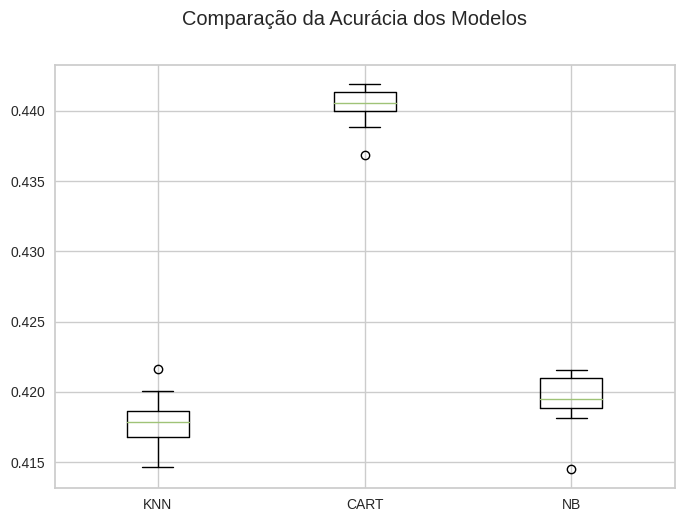

In [64]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [65]:
# Criando um modelo com todo o conjunto de treino
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.4193149847916149


Definição de números de clusters para iniciar testes






In [ ]:
# instalando yellowbrick
!pip install yellowbrick

In [ ]:
# importando as novas bibliotecas que irei trabalhar
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


In [ ]:
# Instanciando o metodo KMeans e o Visualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))

In [ ]:
# Selecionando uma amostra aleatória dos dados com 5000 observacões
df_sample = df.sample(n=5000, random_state=1)


In [69]:
visualizer.fit(df_sample)
visualizer.poof()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
# atribuindo os registros aos devidos grupos
kmeans = KMeans(n_clusters=5)
k_fit =  kmeans.fit(df)

In [71]:
# inserindo os rótulos de clusters no dataframe
predicoes = k_fit.labels_
df['Clusters'] = predicoes


In [72]:
# verificando os dados
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,...,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,1
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,...,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,2
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,...,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,2
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,...,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,4
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,...,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,1


Analisando os grupos

In [73]:
# qual a quantidade de observações em cada grupo?
df["Clusters"].value_counts()

Clusters
3    165265
2    155066
1    153752
0    147007
4    123565
Name: count, dtype: int64

In [74]:
# agrupando os registros por grupos e tirando a média
df.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,
0,1.80,3.63,2.24,4.06,2.30,3.19,1.75,4.08,2.18,4.49,...,3.52,2.38,4.08,2.13,3.43,2.09,3.69,3.19,4.29,3.72
1,3.47,1.95,4.34,2.23,4.27,1.67,3.89,2.81,3.75,2.52,...,3.92,1.75,4.10,1.79,4.17,1.66,4.34,3.26,4.10,4.30
2,2.14,3.29,3.13,3.65,2.99,2.71,2.24,3.99,2.34,4.12,...,3.56,2.16,3.87,2.09,3.71,1.99,4.01,2.95,4.25,3.78
3,3.45,1.92,3.80,2.51,4.05,1.83,3.66,2.77,3.78,3.00,...,3.79,2.11,4.27,1.96,3.98,1.77,4.00,3.40,4.21,4.21
4,2.15,3.45,2.78,3.59,2.60,2.88,2.11,3.71,2.70,4.00,...,3.73,1.96,3.80,2.06,3.79,2.05,4.08,3.32,3.91,3.84


Calculando a média de cada grupo de questões para verificar um padrao

In [75]:
# selecionando colunas de cada grupo
col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

In [76]:
# Somando os valores de cada grupo
# para isso vou criar um novo dataframe
df_soma = pd.DataFrame()
df_soma['extroversion'] = df[ext].sum(axis=1)/10
df_soma['neurotic'] = df[est].sum(axis=1)/10
df_soma['agreeable'] = df[agr].sum(axis=1)/10
df_soma['conscientious'] = df[csn].sum(axis=1)/10
df_soma['open'] = df[opn].sum(axis=1)/10
df_soma['Clusters'] = predicoes


In [77]:
# Exibindo o valor médio por grupo
df_soma.groupby('Clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
Clusters,,,,,
0,2.97,3.67,3.16,3.18,3.25
1,3.09,2.42,3.21,3.11,3.34
2,3.06,2.99,3.19,3.16,3.24
3,3.08,3.43,3.31,3.22,3.37
4,3.00,2.64,2.95,3.03,3.25


In [78]:
# Visualizando as médias por grupo
df_clusters = df_soma.groupby('Clusters').mean()

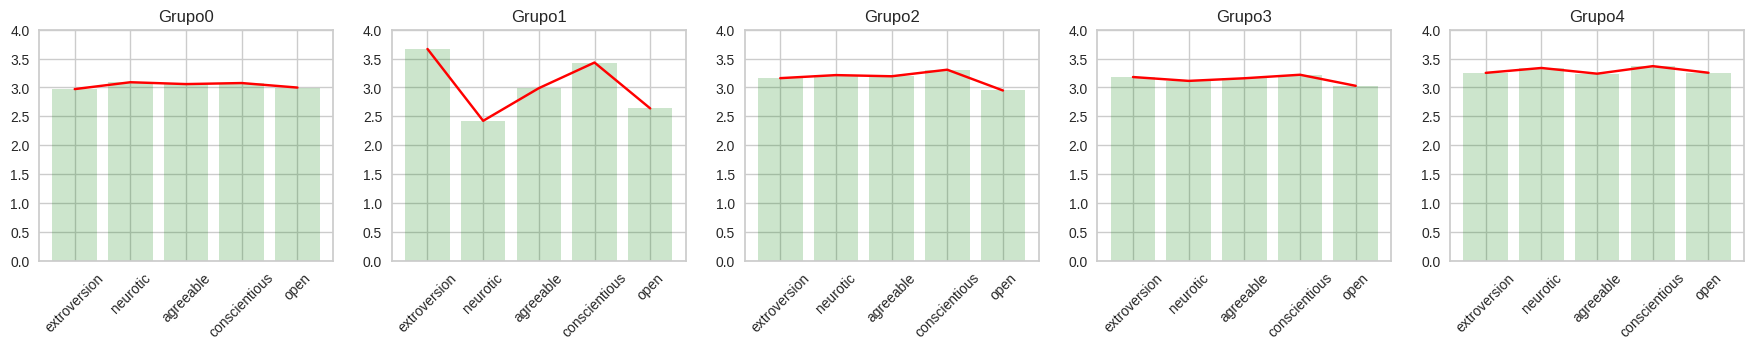

In [79]:
plt.figure(figsize=(22,3))
for i in range(0, 5):
  plt.subplot(1,5,i+1)
  plt.bar(df_clusters.columns,df_clusters.iloc[:, i], color = 'green', alpha=0.2)
  plt.plot(df_clusters.columns,df_clusters.iloc[:, i], color = 'red')
  plt.title('Grupo' + str(i))
  plt.xticks(rotation=45)
  plt.ylim(0,4)


In [80]:
# instalando a biblioteca grandio
!pip install gradio

In [93]:
import gradio as gr

In [86]:
# lendo os dados com as questões
dicio_question = open("question.txt").read().split("\n")

In [87]:
# verificando os dados
dicio_question

['EXT1\tEu sou a vida da festa.',
 'EXT2\tEu não falo muito.',
 'EXT3\tEu me sinto confortável perto de pessoas.',
 'EXT4\tEu fico no fundo.',
 'EXT5\tEu inicio conversas.',
 'EXT6\tEu tenho pouco a dizer.',
 'EXT7\tEu converso com muitas pessoas diferentes em festas.',
 'EXT8\tEu não gosto de chamar atenção para mim.',
 'EXT9\tEu não me importo de ser o centro das atenções.',
 'EXT10\tEu sou quieto perto de estranhos.',
 'EST1\tEu me estresso facilmente.',
 'EST2\tEu estou relaxado na maior parte do tempo.',
 'EST3\tEu me preocupo com as coisas.',
 'EST4\tEu raramente me sinto triste.',
 'EST5\tEu me perturbo facilmente.',
 'EST6\tEu me chateio facilmente.',
 'EST7\tEu mudo meu humor frequentemente.',
 'EST8\tEu tenho mudanças de humor frequentes.',
 'EST9\tEu me irrito facilmente.',
 'EST10\tEu frequentemente me sinto triste.',
 'AGR1\tEu tenho pouca preocupação pelos outros.',
 'AGR2\tEu me interesso pelas pessoas.',
 'AGR3\tEu insulto as pessoas.',
 'AGR4\tEu simpatizo com os senti

In [94]:
# Limpando os dados e recuperando apenas as questões
question = []
for q in dicio_question:
  q = str(q)
  question.append(q[q.find("\t"):].lstrip())

In [95]:
# verificando os dados
question

['Eu sou a vida da festa.',
 'Eu não falo muito.',
 'Eu me sinto confortável perto de pessoas.',
 'Eu fico no fundo.',
 'Eu inicio conversas.',
 'Eu tenho pouco a dizer.',
 'Eu converso com muitas pessoas diferentes em festas.',
 'Eu não gosto de chamar atenção para mim.',
 'Eu não me importo de ser o centro das atenções.',
 'Eu sou quieto perto de estranhos.',
 'Eu me estresso facilmente.',
 'Eu estou relaxado na maior parte do tempo.',
 'Eu me preocupo com as coisas.',
 'Eu raramente me sinto triste.',
 'Eu me perturbo facilmente.',
 'Eu me chateio facilmente.',
 'Eu mudo meu humor frequentemente.',
 'Eu tenho mudanças de humor frequentes.',
 'Eu me irrito facilmente.',
 'Eu frequentemente me sinto triste.',
 'Eu tenho pouca preocupação pelos outros.',
 'Eu me interesso pelas pessoas.',
 'Eu insulto as pessoas.',
 'Eu simpatizo com os sentimentos dos outros.',
 'Eu não estou interessado nos problemas dos outros.',
 'Eu tenho um coração mole.',
 'Eu realmente não me interesso pelos ou

In [101]:
# Criando os inputs dinamicos para passar ao gradio
inputs_question = []
for q in question:
  obj_input = gr.Slider(minimum=1, maximum=5, step=1, value=3, label=q)
  inputs_question.append(obj_input)

In [ ]:
# verificando inputs
inputs_question

In [ ]:
# criando a interface e a função predict
def predict(*outputs_question):
  outputs_question = np.array(outputs_question).reshape(1, -1)
  return k_fit.predict(outputs_question)

iface = gr.Interface(
                    fn = predict,
                    title = "Big Five Personality",
                    description = "Sistema para detecção de traços de personalidade.",
                    inputs = inputs_question,
                    outputs = "text")
iface.launch(share=True)

In [102]:
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))



# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))


# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))


# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original

pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))


# Dataset Padronizado

pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))


# Dataset Normalizado

pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))


# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

In [ ]:
# Novos dados - não sabemos a classe!
data = {
        }

atributos = []
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)